In [15]:
import numpy as np
import heapq
from collections import deque
import matplotlib.pyplot as plt
from PIL import Image

###Q1)

In [ ]:
class Node:
  def __init__(self,state,parent,action,counter):
    self.state = state
    self.parent = parent
    self.action = action
    self.cost = counter
  def print_node(self):
    self.state.print_state()
    #if(self.parent):
      #self.parent.state.print_state()
    print(self.action,self.cost)

In [ ]:
class State:
  def __init__(self,x,y,col):
    self.loc = (x,y)
    self.col = col
  def print_state(self):
    print(self.loc,self.col)
  def __eq__(self, other):
        return (self.loc == other.loc and self.col==other.col)

In [ ]:
n = 10
start = State(1,1,0)
d = np.zeros((n+1,n+1))
d[n-1,n-1] = 2
d[1,1] = 1
goal = [State(n-1,n-1,2)]
n_block = n*4
blocked = []
for i in range(n+1):
  blocked.append((0,i))
for i in range(1,n+1):
  blocked.append((i,n))
  blocked.append((i,0))
for i in range(1,n):
  blocked.append((n,i))
for i in range(n):
  blocked.append((np.random.randint(2,n-2),np.random.randint(2,n-2)))
for (x,y) in blocked:
  d[x,y] = -1

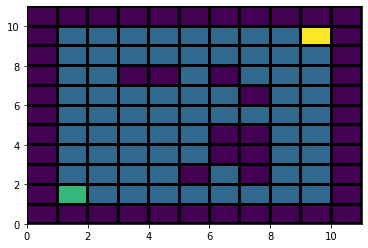

In [ ]:
plt.pcolor(d,linewidths=2,ec='black')
d[1,1] = 0

violet = blocked

blue = unblocked

yellow = goal

green = start


In [ ]:
progress = []

In [ ]:
def BFS(n_block,block,start,goal):
  explored = []
  cur = Node(start,None,None,0)
  q = deque([cur])
  goal_reached = False
  while(q and not goal_reached):
    cur_d = np.array(d)
    u = q.popleft()
    if(u.state in explored):
      continue
    explored.append(u.state)
    if(u.state in goal):
      u.state.col = 0
      goal_reached = True
      return u
    if(u.state.loc in block):
      u.state.col = -1
      continue

    cur_d[u.state.loc[0],u.state.loc[1]] = 1
    plt.pcolor(cur_d,linewidths=2,ec='black')
    plt.savefig('a.jpg')
    img = Image.open('a.jpg')
    progress.append(np.asarray(img))

    #plt.pause(0.1)
    #action up
    new_loc = (u.state.loc[0],u.state.loc[1]+1)
    v = Node(State(new_loc[0],new_loc[1],2),u,'up',u.cost+1)
    q.append(v)
    #action right
    new_loc = (u.state.loc[0]+1,u.state.loc[1])
    v = Node(State(new_loc[0],new_loc[1],2),u,'right',u.cost+1)
    q.append(v)
    #action down
    new_loc = (u.state.loc[0],u.state.loc[1]-1)
    v = Node(State(new_loc[0],new_loc[1],2),u,'down',u.cost+1)
    q.append(v)
    #action left
    new_loc = (u.state.loc[0]-1,u.state.loc[1])
    v = Node(State(new_loc[0],new_loc[1],2),u,'left',u.cost+1)
    q.append(v)

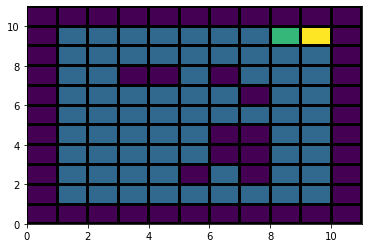

In [ ]:
goal_node = BFS(n_block,blocked,start,goal)

In [ ]:
imgs = np.array(progress)
print(imgs.shape)
imgs = [Image.fromarray(img) for img in imgs]
imgs[0].save("/usr/local/share/jupyter/nbextensions/array_bfs.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)

(71, 288, 432, 3)


In [ ]:
%%html
<img src='/nbextensions/array_bfs.gif' />

Output hidden; open in https://colab.research.google.com to view.

violet = blocked

blue = unblocked

yellow = goal

green = current node


###Q2)

In [ ]:
progress = []

In [ ]:
def DFS(n_block,block,start,goal):
  explored = []
  cur = Node(start,None,None,0)
  q = deque([cur])
  goal_reached = False
  while(q and not goal_reached):
    cur_d = np.array(d)
    u = q.popleft()
    #u.print_node()
    if(u.state in explored):
      continue
    explored.append(u.state)
    if(u.state in goal):
      u.state.col = 0
      goal_reached = True
      return u
    if(u.state.loc in block):
      u.state.col = -1
      continue
    
    cur_d[u.state.loc[0],u.state.loc[1]] = 1
    plt.pcolor(cur_d,linewidths=2,ec='black')
    plt.savefig('a.jpg')
    img = Image.open('a.jpg')
    progress.append(np.asarray(img))

    #action left
    new_loc = (u.state.loc[0]-1,u.state.loc[1])
    v = Node(State(new_loc[0],new_loc[1],2),u,'left',u.cost+1)
    q.appendleft(v)
    #action down
    new_loc = (u.state.loc[0],u.state.loc[1]-1)
    v = Node(State(new_loc[0],new_loc[1],2),u,'down',u.cost+1)
    q.appendleft(v)
    #action up
    new_loc = (u.state.loc[0],u.state.loc[1]+1)
    v = Node(State(new_loc[0],new_loc[1],2),u,'up',u.cost+1)
    q.appendleft(v)
    #action right
    new_loc = (u.state.loc[0]+1,u.state.loc[1])
    v = Node(State(new_loc[0],new_loc[1],2),u,'right',u.cost+1)
    q.appendleft(v)

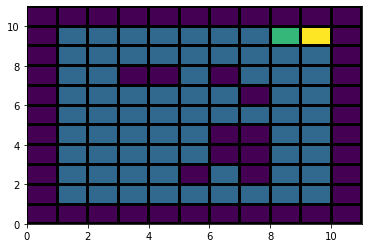

In [ ]:
goal_node = DFS(n_block,blocked,start,goal)

In [ ]:
imgs = np.array(progress)
print(imgs.shape)
imgs = [Image.fromarray(img) for img in imgs]
imgs[0].save("/usr/local/share/jupyter/nbextensions/array_dfs.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)

(16, 288, 432, 3)


In [ ]:
%%html
<img src='/nbextensions/array_dfs.gif' />

violet = blocked

blue = unblocked

yellow = goal

green = current node


###Q3)

In [52]:
class Node:
  def __init__(self,state,parent,action,counter):
    self.state = state
    self.parent = parent
    self.action = action
    self.cost = counter
  def print_node(self):
    self.state.print_state()
    print(self.action,self.cost)

In [53]:
class State:
  def __init__(self,loc1,loc2,d,col):
    self.loc1 = loc1
    self.loc2 = loc2
    self.d = d
    self.col = col
  def print_state(self):
    print(self.d)
  def __eq__(self, other):
        return (self.d==other.d)

In [54]:
def num_to_np(num):
  n = 3
  d = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      d[i,j] = int(num%10)
      num=int(num//10)
  return d

In [55]:
def np_to_num(d):
  cnt = 0
  k=0
  for i in d:
    for j in i:
      cnt += j*(10**k)
      k+=1
  return cnt

In [56]:
start_d = np_to_num(np.array([[2,6,0],[4,3,7],[5,0,1]]))
start_loc1 = (0,2)
start_loc2 = (2,1)
start_col = 0
start = State(start_loc1,start_loc2,start_d,start_col)

In [57]:
goal_d = np_to_num(np.array([[1,2,3],[4,5,6],[7,0,0]]))
goal_loc1 = (2,2)
goal_loc2 = (2,1)
goal_col = 1
goal = [State(goal_loc1,goal_loc2,goal_d,goal_col),State(goal_loc2,goal_loc1,goal_d,goal_col)]

In [58]:
num_to_np(start_d)

array([[2., 6., 0.],
       [4., 3., 7.],
       [5., 0., 1.]])

In [59]:
goal_d

7654321

In [60]:
num_to_np(goal_d)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 0., 0.]])

In [61]:
def new_state(state,dx,dy,id):
  if(id==1):
    cur = state.loc1
    new = (cur[0]+dx,cur[1]+dy)
    if(new[0]>=3 or new[0]<0 or new[1]>=3 or new[1]<0 or new==state.loc2):
      return None
    d1 = np.array(num_to_np(state.d))
    d1[cur[0],cur[1]],d1[new[0],new[1]] = d1[new[0],new[1]],d1[cur[0],cur[1]]
    state1 = State(new,state.loc2,np_to_num(d1),2)
  if(id==2):
    cur = state.loc2
    new = (cur[0]+dx,cur[1]+dy)
    if(new[0]>=3 or new[0]<0 or new[1]>=3 or new[1]<0 or new==state.loc1):
      return None
    d1 = np.array(num_to_np(state.d))
    d1[cur[0],cur[1]],d1[new[0],new[1]] = d1[new[0],new[1]],d1[cur[0],cur[1]]
    state1 = State(state.loc1,new,np_to_num(d1),2)
  return state1

In [98]:
def BFS(start,goal):
  cur = Node(start,None,None,0)
  q = deque([cur])
  goal_reached = False
  explored = {}
  while(q and not goal_reached):
    u = q.popleft()
    #print(u.state.d)
    if(u.state.d in explored):
      continue
    explored[u.state.d] = 1
    if(u.state in goal):
      goal_reached = True
      u.state.col = 1
      return u
    #actions on empty cell 1
    state1 = new_state(u.state,0,1,1)
    if(state1):
      v = Node(state1,u,'up',u.cost+1)
      q.append(v)

    state1 = new_state(u.state,-1,0,1)
    if(state1):
      v = Node(state1,u,'left',u.cost+1)
      q.append(v)

    state1 = new_state(u.state,0,-1,1)
    if(state1):
      v = Node(state1,u,'down',u.cost+1)
      q.append(v)

    state1 = new_state(u.state,1,0,1)
    if(state1):
      v = Node(state1,u,'right',u.cost+1)
      q.append(v)
    #actions on empty cell 2
    state1 = new_state(u.state,0,1,2)
    if(state1):
      v = Node(state1,u,'up',u.cost+1)
      q.append(v)

    state1 = new_state(u.state,-1,0,2)
    if(state1):
      v = Node(state1,u,'left',u.cost+1)
      q.append(v)
    
    state1 = new_state(u.state,0,-1,2)
    if(state1):
      v = Node(state1,u,'down',u.cost+1)
      q.append(v)
    
    state1 = new_state(u.state,1,0,2)
    if(state1):
      v = Node(state1,u,'right',u.cost+1)
      q.append(v)
  print(len(explored))

In [99]:
goal_node = BFS(start,goal)

In [100]:
print(b-a)

16.56990799999994


In [101]:
path = deque([goal_node])
cur = goal_node
while cur.parent:
  path.append(cur.parent)
  cur = cur.parent

In [102]:
print("Total Steps to reach goal : ", len(path)-1)

Total Steps to reach goal :  16


In [103]:
while(path):
  cur = path.pop()
  print(num_to_np(cur.state.d))

[[2. 6. 0.]
 [4. 3. 7.]
 [5. 0. 1.]]
[[2. 0. 6.]
 [4. 3. 7.]
 [5. 0. 1.]]
[[2. 3. 6.]
 [4. 0. 7.]
 [5. 0. 1.]]
[[2. 3. 6.]
 [4. 0. 7.]
 [5. 1. 0.]]
[[2. 3. 6.]
 [4. 1. 7.]
 [5. 0. 0.]]
[[2. 3. 6.]
 [4. 1. 7.]
 [0. 5. 0.]]
[[2. 3. 6.]
 [0. 1. 7.]
 [4. 5. 0.]]
[[2. 3. 6.]
 [1. 0. 7.]
 [4. 5. 0.]]
[[2. 3. 6.]
 [1. 5. 7.]
 [4. 0. 0.]]
[[2. 3. 6.]
 [1. 5. 0.]
 [4. 0. 7.]]
[[2. 3. 6.]
 [1. 5. 0.]
 [4. 7. 0.]]
[[2. 3. 0.]
 [1. 5. 6.]
 [4. 7. 0.]]
[[2. 0. 3.]
 [1. 5. 6.]
 [4. 7. 0.]]
[[0. 2. 3.]
 [1. 5. 6.]
 [4. 7. 0.]]
[[1. 2. 3.]
 [0. 5. 6.]
 [4. 7. 0.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [0. 7. 0.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 0. 0.]]


In [104]:
start_d = np_to_num(np.array([[2,3,1],[6,4,5],[0,0,7]]))
start_loc1 = (2,0)
start_loc2 = (2,1)
start_col = 0
start1 = State(start_loc1,start_loc2,start_d,start_col)

In [105]:
goal_node = BFS(start1,goal)

In [106]:
path = deque([goal_node])
cur = goal_node
while cur.parent:
  path.append(cur.parent)
  cur = cur.parent

In [107]:
print("Total Steps to reach goal : ", len(path)-1)

Total Steps to reach goal :  18


In [108]:
while(path):
  cur = path.pop()
  print(num_to_np(cur.state.d))

[[2. 3. 1.]
 [6. 4. 5.]
 [0. 0. 7.]]
[[2. 3. 1.]
 [0. 4. 5.]
 [6. 0. 7.]]
[[2. 3. 1.]
 [4. 0. 5.]
 [6. 0. 7.]]
[[2. 3. 1.]
 [4. 5. 0.]
 [6. 0. 7.]]
[[2. 3. 0.]
 [4. 5. 1.]
 [6. 0. 7.]]
[[2. 0. 3.]
 [4. 5. 1.]
 [6. 0. 7.]]
[[2. 5. 3.]
 [4. 0. 1.]
 [6. 0. 7.]]
[[2. 5. 3.]
 [4. 1. 0.]
 [6. 0. 7.]]
[[2. 5. 3.]
 [4. 1. 0.]
 [0. 6. 7.]]
[[2. 5. 3.]
 [0. 1. 0.]
 [4. 6. 7.]]
[[2. 5. 3.]
 [1. 0. 0.]
 [4. 6. 7.]]
[[2. 5. 3.]
 [1. 6. 0.]
 [4. 0. 7.]]
[[2. 5. 3.]
 [1. 0. 6.]
 [4. 0. 7.]]
[[2. 0. 3.]
 [1. 5. 6.]
 [4. 0. 7.]]
[[0. 2. 3.]
 [1. 5. 6.]
 [4. 0. 7.]]
[[1. 2. 3.]
 [0. 5. 6.]
 [4. 0. 7.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [0. 0. 7.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [0. 7. 0.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 0. 0.]]
